In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
train_files = '/Users/Kashif/Downloads/vis/datasets/cifar10/cifar-10-batches-py/data_batch_'
batches = 5
X_list, y_list = [], []
for i in range(batches):
    file_name = train_files + str(i+1)
    data = unpickle(file_name)
    X_list.append(data[b'data'])
    y_list.append(data[b'labels'])

In [4]:
test_file = '/Users/Kashif/Downloads/vis/datasets/cifar10/cifar-10-batches-py/test_batch'
data = unpickle(test_file)
X_test, y_test = data[b'data'], np.array(data[b'labels'])

In [5]:
X_train = X_list[0]
y_train = y_list[0]
for i in range(1, len(X_list)):
    X_train = np.vstack((X_train,X_list[i]))
    y_train = np.hstack((y_train, y_list[i]))

In [6]:
targets = {}
targets[0] = 'airplane'
targets[1] = 'automobile'
targets[2] = 'bird'
targets[3] = 'cat'
targets[4] = 'deer'
targets[5] = 'dog'
targets[6] = 'frog'
targets[7] = 'horse'
targets[8] = 'ship'
targets[9] = 'truck'

In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [8]:
#keeping only two classes, say cat vs. truck
X_train_cat = X_train[y_train == 3, :]
y_train_cat = y_train[y_train == 3]
X_train_truck = X_train[y_train == 9, :]
y_train_truck = y_train[y_train == 9]
X_train = np.vstack((X_train_cat, X_train_truck))
y_train = np.hstack((y_train_cat, y_train_truck))

X_test_cat = X_test[y_test == 3, :]
y_test_cat = y_test[y_test == 3]
X_test_truck = X_test[y_test == 9, :]
y_test_truck = y_test[y_test == 9]
X_test = np.vstack((X_test_cat, X_test_truck))
y_test = np.hstack((y_test_cat, y_test_truck))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(10000, 3072) (10000,) (2000, 3072) (2000,)


In [9]:
def image_from_vector(x):
    I = np.zeros((32,32,3), dtype=np.uint8)
    I[:,:,0] = x[:1024].reshape(32,32)
    I[:,:,1] = x[1024:2*1024].reshape(32,32)
    I[:,:,2] = x[2*1024:].reshape(32,32)
    return I

In [10]:
def rgb2gray(I):
    I.astype(np.float32)
    r, g, b = I[:,:,0], I[:,:,1], I[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray.astype(np.uint8)

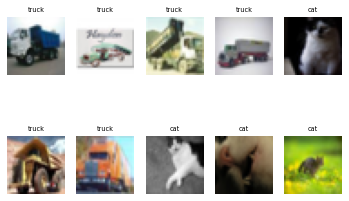

In [11]:
n_row = 2
n_col = 5
#plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    idx = np.random.randint(len(y_train))
    I = image_from_vector(X_train[idx,:])
#     plt.imshow(rgb2gray(I),cmap='gray'); plt.axis('off')
    plt.imshow(I); plt.axis('off')
    title_text = targets[y_train[idx]]
    plt.title(title_text,size=6.5)

plt.show()

In [12]:
def crop_random_patches(I, n_samples, d1=16, d2=16, to_gray = True):
    if to_gray:
        I = rgb2gray(I)
    C = []
    for i in range(n_samples):
        r = np.random.randint(I.shape[0] - d1)
        c = np.random.randint(I.shape[1] - d2)
        if to_gray:
            C.append(I[r:r+d1, c:c+d2].copy())
        else:
            C.append(I[r:r+d1, c:c+d2, :].copy())
    return np.array(C)

In [13]:
def crop_all_patches(I, d1, d2, s1=1, s2=1, to_gray = True):
    if to_gray:
        I = rgb2gray(I)
        
    n_rows, n_cols = I.shape[0], I.shape[1]
    C = []
    for r in range(0,n_rows-d1,s1):
        for c in range(0, n_cols-d2, s2):
            if to_gray:
                C.append(I[r:r+d1, c:c+d2].copy())
            else:
                C.append(I[r:r+d1, c:c+d2, :].copy())
    return np.array(C)

In [14]:
d1, d2 = 16, 16
nSamples = 4
P = []
for i in range(len(y_train)):
    P.append(crop_random_patches(image_from_vector(X_train[i]), nSamples, d1, d2, to_gray=False))
P = np.array(P)
print(P.shape)

(10000, 4, 16, 16, 3)


(-0.5, 799.5, 799.5, -0.5)

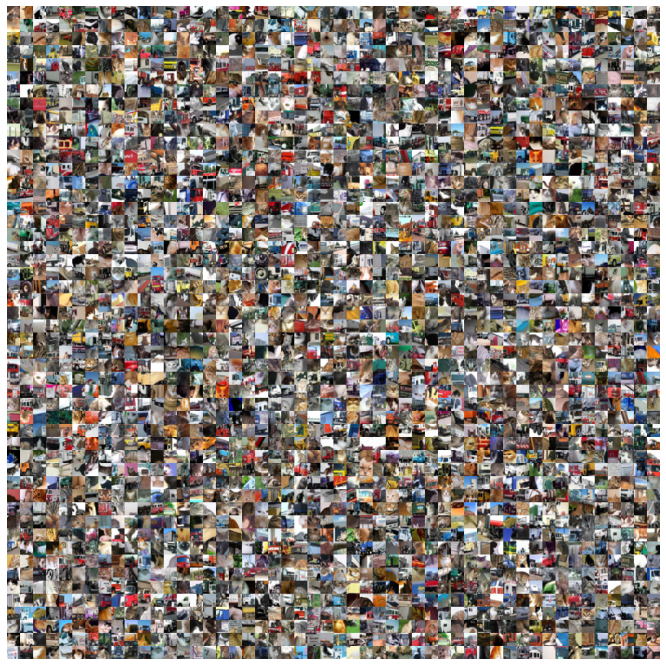

In [15]:
n_display = 50
I_random = np.zeros((n_display*16, n_display*16, 3), dtype = np.uint8)
for r in range(0,n_display*16,16):
    for c in range(0,n_display*16,16):
        img_idx = np.random.randint(P.shape[0])
        patch_idx = np.random.randint(P.shape[1])
        I_random[r:r+16, c:c+16, :] = P[img_idx, patch_idx ,:,:,:]

plt.figure(figsize=(12,12))
plt.imshow(I_random); plt.axis('off')

In [16]:
d1, d2 = 16, 16
nSamples = 4
P = []
for i in range(len(y_train)):
    P.append(crop_random_patches(image_from_vector(X_train[i]), nSamples, d1, d2))
P = np.array(P)

In [17]:
def vectorize_patch_tensor(P):
    X = []
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            X.append(P[i, j, ...].flatten())
    return np.array(X)

In [18]:
X_train_vec = vectorize_patch_tensor(P)
print(X_train_vec.shape)

(40000, 256)


In [19]:
kmeans = KMeans(n_clusters = 20)
kmeans.fit(X_train_vec)
visual_words = kmeans.cluster_centers_ 

In [20]:
visual_words.shape

(20, 256)

(-0.5, 79.5, 63.5, -0.5)

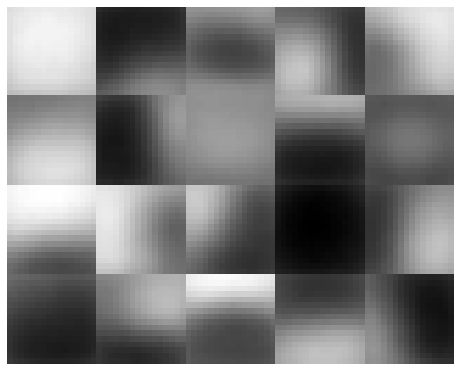

In [21]:
n_display_1 = 4
n_display_2 = 5
I_centers = np.zeros((n_display_1*16, n_display_2*16), dtype = np.uint8)
i = 0
for r in range(0,n_display_1*16,16):
    for c in range(0,n_display_2*16,16):
        I_centers[r:r+16, c:c+16] = visual_words[i,:].reshape(16,16)
        i += 1

plt.figure(figsize=(8,8))
plt.imshow(I_centers, cmap = 'gray'); plt.axis('off')

In [22]:
d1, d2, s1, s2 = 16, 16, 5, 5
P = []
for i in range(len(y_train)):
    P.append(crop_all_patches(image_from_vector(X_train[i]), d1, d2, s1, s2))
P = np.array(P)

In [23]:
num_patches = P.shape[1]
num_images = P.shape[0]
num_words = visual_words.shape[0]
X_train_all_vec = vectorize_patch_tensor(P)

In [24]:
X_train_all_vec.shape

(160000, 256)

In [25]:
xF = X_train_all_vec.dot(visual_words.T)

In [26]:
xF = xF.reshape((num_images, num_patches , num_words)).sum(axis=1)

In [27]:
s = xF.sum(axis=1)[:, np.newaxis]
xF = xF/s

In [28]:
X_train_bovw = xF

In [29]:
d1, d2, s1, s2 = 16, 16, 5, 5
P = []
for i in range(len(y_test)):
    P.append(crop_all_patches(image_from_vector(X_test[i]), d1, d2, s1, s2))
P = np.array(P)

In [30]:
num_patches = P.shape[1]
num_images = P.shape[0]
num_words = visual_words.shape[0]
X_test_all_vec = vectorize_patch_tensor(P)

In [31]:
xF = X_test_all_vec.dot(visual_words.T)
xF = xF.reshape((num_images, num_patches , num_words)).sum(axis=1)
s = xF.sum(axis=1)[:, np.newaxis]
xF = xF/s
X_test_bovw = xF

In [32]:
print(X_train_bovw.shape, X_test_bovw.shape)

(10000, 20) (2000, 20)


In [96]:
#from sklearn.ensemble import RandomForestClassifier as clf
from sklearn.svm import SVC as clf
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score as accuracy

# Creating the pipeline to perform the series of operaions including support vector classification
pipe = make_pipeline(StandardScaler(),clf())
params = {
    "svc__C": np.linspace(1, 20, 5),
    "svc__gamma": np.linspace(0.01, 0.1, 5),
}
num_folds = 4

# Creating the required pipeline
model = GridSearchCV(pipe, params, cv = num_folds)

# Training the model 
model.fit(X_train_bovw, y_train)

# Calculating the training and testing accuracy
train_accuracy = accuracy(y_train, model.predict(X_train_bovw))
test_accuracy = accuracy(y_test, model.predict(X_test_bovw))

print(train_accuracy, test_accuracy)

0.7836 0.7665
